In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import  MinMaxScaler
import logging
import random
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import seaborn as sns

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#import geopandas as gpd

In [3]:
#coastline = gpd.read_file("maltacoast/coastline_polygon.shp")

# Read Data

In [4]:
station = 'MUCR'

stations_sea_rms = pd.read_parquet(f"Processed Data/15.03.2025 Data/{station}.parquet")

#random seed for data splitting
randseed = 27

# Split Data

In [5]:
mlvariables = pd.DataFrame(stations_sea_rms)

X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)] #input variable is columns that start with station name
Y = mlvariables.loc[:, ~mlvariables.columns.str.startswith(station) & (mlvariables.columns != 'sea_mode')] #target variable are the remaining columns
T = mlvariables.index.tolist() #Time series

In [6]:
mlvariables

,MUCR/Z/0.05-0.2,MUCR/Z/0.2-0.35,MUCR/Z/0.35-0.5,MUCR/Z/0.5-0.65,MUCR/Z/0.65-0.8,MUCR/Z/0.8-0.95,MUCR/Z/0.95-1.1,MUCR/Z/1.1-1.25,MUCR/Z/1.25-1.4,MUCR/Z/1.4-1.55,...,MUCR/E/1.7-1.85,MUCR/E/1.85-2.0,"(38.1875, 14.875)","(38.1875, 14.833335876464844)","(38.1875, 14.791667938232422)","(38.1875, 14.958335876464844)","(38.145835876464844, 14.708335876464844)",sea_mean,sea_median,sea_mode
index,,,,,,,,,,,,,,,,,,,,,
2019-05-17 02:00:00+00:00,4.128931e-08,8.516943e-08,6.156414e-08,3.636431e-08,2.320144e-08,1.458454e-08,9.661936e-09,6.722987e-09,6.160582e-09,4.105893e-09,...,3.991756e-09,3.854819e-09,0.637,0.643,0.646,0.389,0.642,0.5914,0.642,0.389
2019-05-17 03:00:00+00:00,4.319941e-08,8.517884e-08,5.932653e-08,3.502956e-08,2.182475e-08,1.452701e-08,1.023182e-08,6.789510e-09,6.238795e-09,4.376304e-09,...,3.810987e-09,3.814059e-09,0.629,0.635,0.640,0.388,0.637,0.5858,0.635,0.388
2019-05-17 04:00:00+00:00,4.134119e-08,7.685802e-08,5.475610e-08,3.069141e-08,2.013328e-08,1.344590e-08,1.054993e-08,7.213032e-09,6.439098e-09,4.754746e-09,...,4.007233e-09,3.940167e-09,0.590,0.596,0.601,0.362,0.599,0.5496,0.596,0.362
2019-05-17 05:00:00+00:00,3.983078e-08,7.377683e-08,5.584247e-08,2.899344e-08,1.870457e-08,1.311682e-08,9.640435e-09,6.457873e-09,5.777480e-09,4.230715e-09,...,4.199497e-09,4.218910e-09,0.558,0.564,0.570,0.340,0.568,0.5200,0.564,0.340
2019-05-17 06:00:00+00:00,4.045545e-08,6.788686e-08,5.184504e-08,2.769680e-08,1.905316e-08,1.268784e-08,8.808355e-09,5.954221e-09,5.541820e-09,4.355304e-09,...,4.180253e-09,4.202502e-09,0.530,0.537,0.543,0.319,0.543,0.4944,0.537,0.543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01 05:00:00+00:00,5.454462e-08,4.391282e-08,1.582237e-08,1.272117e-08,9.775901e-09,6.436522e-09,5.637415e-09,4.807656e-09,4.976487e-09,4.131719e-09,...,3.385946e-09,2.811243e-09,0.070,0.074,0.078,0.060,0.074,0.0712,0.074,0.074
2021-08-01 06:00:00+00:00,3.847504e-08,4.249877e-08,1.510721e-08,1.314595e-08,9.721244e-09,6.821904e-09,6.474944e-09,5.927643e-09,7.100138e-09,5.970351e-09,...,3.921918e-09,3.338879e-09,0.067,0.070,0.073,0.055,0.070,0.0670,0.070,0.070
2021-08-01 07:00:00+00:00,3.667309e-08,4.379962e-08,1.521784e-08,1.210523e-08,8.872543e-09,5.695880e-09,5.204810e-09,4.389930e-09,4.303094e-09,3.496515e-09,...,2.731201e-09,2.785838e-09,0.064,0.067,0.069,0.050,0.066,0.0632,0.066,0.050


In [7]:
#scale values between 0 and 1
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

#fit the scalers
scaler_x.fit(X) 
scaler_y.fit(Y)

MinMaxScaler()

In [8]:
#apply the scalers
Xscale = scaler_x.transform(X) 
Yscale = scaler_y.transform(Y)

In [9]:
#number of chunks in training/test set
nchunks = 40

#number of ks for kfold cross validation
kfolds = 5

lenchunk = round(Xscale.shape[0]/nchunks)

In [10]:
#Generates k-th datasets for Cross Validation 
list_of_dataset = [{'idx': [], 'XscaleTrain': [], 'YscaleTrain': [], 'XscaleTest': [], 'YscaleTest': []} for number in range(kfolds)]

In [11]:
#split data into 40 chunks (or nchunks)
all_chunks = np.array_split(np.arange(Xscale.shape[0]), nchunks)

#random shuffle of chunks
random.seed(randseed)
random.shuffle(all_chunks)

#this method only works if nchunks is perfectly divisible by kfolds (eg 40/5 = 8)
if nchunks % kfolds != 0:
    raise ValueError("Number of chunks must be divisible by number of folds.")

nchunks_per_fold = nchunks // kfolds

#assign chunks to folds
for i in range(kfolds):
    test_chunks = all_chunks[i*nchunks_per_fold : (i+1)*nchunks_per_fold] #separate date from chunk i=1: 0 to 7, i=2: 8 to 15...
    train_chunks = all_chunks[ : i*nchunks_per_fold] + all_chunks[(i+1)*nchunks_per_fold:] #one set for test set, remaining for training
    train_idx = np.concatenate(train_chunks)
    test_idx = np.concatenate(test_chunks)
    
    list_of_dataset[i]['idx'] = train_idx
    list_of_dataset[i]['XscaleTrain'] = Xscale[train_idx, :]
    list_of_dataset[i]['YscaleTrain'] = Yscale[train_idx, :]
    list_of_dataset[i]['XscaleTest'] = Xscale[test_idx, :]
    list_of_dataset[i]['YscaleTest'] = Yscale[test_idx, :]

In [12]:
len(list_of_dataset[0]['idx'])

15500

# Build and train RF Regressor

In [13]:
#analysis of results showed that for WDD, the best R2 and MAE were achieved for both sea_mean and sea_median on the same set of hyperparameters

# random forest maximum depth     
RF_max_depth = 30

# random forest number of estimators  
RF_n_estimators = 100

# random forest maximum features 
RF_max_features = 0.5

# random forest min samples to split
RF_min_samples_split = 10

#random forest min samples per leaf
RF_min_samples_leaf = 1

In [14]:
RF_model = RandomForestRegressor(bootstrap = True,
                                 max_depth=RF_max_depth,
                                 n_estimators=RF_n_estimators,
                                 max_features= RF_max_features,
                                 min_samples_split = RF_min_samples_split,
                                 min_samples_leaf = RF_min_samples_leaf,
                                 verbose=1)

In [15]:
#Initiliaze the empty variables
Ypred = None
YTest = None

In [16]:
#Applies the learning/prediction to the k datasets
Ypred_kfold = []
YTest_kfold = []

for i, dic in enumerate(list_of_dataset):
    Ypred = None
    YTest = None
    
    #Fits the model to training data
    RF_model.fit(dic['XscaleTrain'], dic['YscaleTrain'])
    
    #Predicts the sea wave data by using the testing data
    ypred  = RF_model.predict(dic['XscaleTest'])
    
    #Inverts the scaling of the data and stores the results in the predicted/testing arrays
    Ypred = scaler_y.inverse_transform(ypred)
    YTest = scaler_y.inverse_transform(dic['YscaleTest'])
    
    #Append to kfold results
    Ypred_kfold.append(Ypred)
    YTest_kfold.append(YTest)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   22.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   22.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   21.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   21.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   20.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


# Compute evaluation metrics and save data to parquet

In [38]:
results = []

#the names of the target variables are the last eight columns of the station data
target_names = mlvariables.columns[-8:-1].tolist()
for f in range(kfolds):
    Ypred = Ypred_kfold[f]
    YTest = YTest_kfold[f]

    #convert to df to save the data
    Ypred_df = pd.DataFrame(Ypred)
    YTest_df = pd.DataFrame(YTest)

    #save to parquet to preserve dat
    Ypred_df.to_parquet(f"results/kfold_data/{station}/fold{f}_Ypred.parquet", engine="pyarrow")
    YTest_df.to_parquet(f"results/kfold_data/{station}/fold{f}_YTest.parquet", engine="pyarrow")
    
    for i, target in enumerate(target_names):
        mae = mean_absolute_error(YTest[:, i], Ypred[:, i])
        mse = mean_squared_error(YTest[:, i], Ypred[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(YTest[:, i], Ypred[:, i])
    
        #append the results as a row
        results.append([f, station, target, RF_max_depth, RF_n_estimators, RF_max_features, mae, mse, rmse, r2])

#creates results dataframe
results_df = pd.DataFrame(results, columns=["Fold", "Station", "Target Variable", "RF_max_depth", "RF_n_estimators", "RF_max_features", "MAE", "MSE", "RMSE", "R2"])

In [39]:
results_df

,Fold,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2
0,0,MUCR,"(38.1875, 14.875)",30,100,0.5,0.164980,0.059857,0.244657,0.742833
1,0,MUCR,"(38.1875, 14.833335876464844)",30,100,0.5,0.162447,0.058028,0.240890,0.752205
2,0,MUCR,"(38.1875, 14.791667938232422)",30,100,0.5,0.161534,0.057688,0.240184,0.758268
3,0,MUCR,"(38.1875, 14.958335876464844)",30,100,0.5,0.093238,0.017541,0.132444,0.734019
4,0,MUCR,"(38.145835876464844, 14.708335876464844)",30,100,0.5,0.163147,0.059407,0.243736,0.747813
5,0,MUCR,sea_mean,30,100,0.5,0.146368,0.046904,0.216573,0.754810
6,0,MUCR,sea_median,30,100,0.5,0.162564,0.058288,0.241429,0.751081
7,1,MUCR,"(38.1875, 14.875)",30,100,0.5,0.196453,0.081611,0.285677,0.852381
8,1,MUCR,"(38.1875, 14.833335876464844)",30,100,0.5,0.191259,0.076834,0.277190,0.860794
9,1,MUCR,"(38.1875, 14.791667938232422)",30,100,0.5,0.188050,0.074377,0.272721,0.866877


# Evaluate k-fold results

In [40]:
sea_mean_results = results_df[(results_df["Target Variable"] == "sea_mean")]
sea_mean_results.describe()

,Fold,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,30.0,100.0,0.5,0.142559,0.043717,0.207843,0.798822
std,1.581139,0.0,0.0,0.0,0.018906,0.010842,0.025458,0.046775
min,0.000000,30.0,100.0,0.5,0.116771,0.031602,0.177770,0.754810
25%,1.000000,30.0,100.0,0.5,0.137248,0.037855,0.194565,0.758209
50%,2.000000,30.0,100.0,0.5,0.142982,0.041905,0.204708,0.792589
75%,3.000000,30.0,100.0,0.5,0.146368,0.046904,0.216573,0.821905
max,4.000000,30.0,100.0,0.5,0.169425,0.060320,0.245601,0.866596


In [41]:
sea_median_results = results_df[(results_df["Target Variable"] == "sea_median")]
sea_median_results.describe()

,Fold,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,30.0,100.0,0.5,0.159172,0.054849,0.232736,0.792138
std,1.581139,0.0,0.0,0.0,0.021816,0.013985,0.029214,0.045811
min,0.000000,30.0,100.0,0.5,0.129878,0.039567,0.198915,0.751081
25%,1.000000,30.0,100.0,0.5,0.152746,0.047018,0.216836,0.752790
50%,2.000000,30.0,100.0,0.5,0.160000,0.052807,0.229797,0.784548
75%,3.000000,30.0,100.0,0.5,0.162564,0.058288,0.241429,0.811324
max,4.000000,30.0,100.0,0.5,0.190671,0.076563,0.276701,0.860949


# Plot some Data

In [42]:
#find the best performing fold
best_model_R2 = sea_mean_results.loc[sea_mean_results["R2"].idxmax()]
print(best_model_R2)

Fold                      1
Station                MUCR
Target Variable    sea_mean
RF_max_depth             30
RF_n_estimators         100
RF_max_features         0.5
MAE                0.169425
MSE                 0.06032
RMSE               0.245601
R2                 0.866596
Name: 12, dtype: object


Set the best fold

In [43]:
bestfoldnum = 1

In [44]:
best_Ypred = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_Ypred.parquet")
best_YTest = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_YTest.parquet")

In [45]:
# we need to find the index in date/time of the test set, as it was lost in transformation

#create the full list of indexes - for WDD there were 9421 rows of data
full_list = list(range(mlvariables.shape[0]))

#identify the numbers that are to be removed for bestfold
remove_list = list_of_dataset[bestfoldnum]['idx']

#remove the indexes that were part of the training set from the index
filtered_list = list(set(full_list) - set(remove_list))

#retrieve the index from the original dataframe mlvariables, to get date and time stamps
match_index = mlvariables.iloc[filtered_list].index

best_Ypred.index = match_index
best_YTest.index = match_index

#update the header
header = [
    (38.1875, 14.875),
    (38.1875, 14.833335876464844),
    (38.1875, 14.791667938232422),
    (38.1875, 14.958335876464844),
    (38.145835876464844, 14.708335876464844),
    "sea_mean",
    "sea_median"
]

best_Ypred.columns = header
best_YTest.columns = header

In [46]:
best_Ypred

,"(38.1875, 14.875)","(38.1875, 14.833335876464844)","(38.1875, 14.791667938232422)","(38.1875, 14.958335876464844)","(38.145835876464844, 14.708335876464844)",sea_mean,sea_median
index,,,,,,,
2019-05-17 02:00:00+00:00,0.378774,0.384141,0.389930,0.226484,0.379870,0.351840,0.382347
2019-05-17 03:00:00+00:00,0.367008,0.372747,0.378995,0.223195,0.368754,0.342140,0.371122
2019-05-17 04:00:00+00:00,0.421849,0.426688,0.432412,0.241003,0.423507,0.389092,0.425183
2019-05-17 05:00:00+00:00,0.420014,0.425056,0.431206,0.240044,0.421921,0.387648,0.423479
2019-05-17 06:00:00+00:00,0.330963,0.337025,0.343692,0.195051,0.334580,0.308262,0.335751
...,...,...,...,...,...,...,...
2021-04-06 21:00:00+00:00,0.327274,0.332625,0.338238,0.202903,0.327722,0.305752,0.330202
2021-04-06 09:00:00+00:00,0.242442,0.246071,0.250701,0.150584,0.241497,0.226259,0.244234
2021-04-03 16:00:00+00:00,0.247722,0.251788,0.256820,0.150898,0.246561,0.230757,0.249688


In [47]:
best_YTest

,"(38.1875, 14.875)","(38.1875, 14.833335876464844)","(38.1875, 14.791667938232422)","(38.1875, 14.958335876464844)","(38.145835876464844, 14.708335876464844)",sea_mean,sea_median
index,,,,,,,
2019-05-17 02:00:00+00:00,0.172,0.173,0.178,0.133,0.178,0.1668,0.173
2019-05-17 03:00:00+00:00,0.171,0.172,0.176,0.133,0.175,0.1654,0.172
2019-05-17 04:00:00+00:00,0.163,0.165,0.171,0.124,0.169,0.1584,0.165
2019-05-17 05:00:00+00:00,0.158,0.160,0.167,0.116,0.164,0.1530,0.160
2019-05-17 06:00:00+00:00,0.155,0.158,0.165,0.109,0.162,0.1498,0.158
...,...,...,...,...,...,...,...
2021-04-06 21:00:00+00:00,0.132,0.137,0.141,0.120,0.130,0.1320,0.132
2021-04-06 09:00:00+00:00,0.130,0.134,0.138,0.119,0.126,0.1294,0.130
2021-04-03 16:00:00+00:00,0.128,0.132,0.135,0.117,0.124,0.1272,0.128


In [48]:
best_Ypred.index = best_Ypred.index.tz_convert(None)
best_YTest.index = best_YTest.index.tz_convert(None)

In [49]:
print(best_YTest.index.tolist())

[Timestamp('2019-05-17 02:00:00'), Timestamp('2019-05-17 03:00:00'), Timestamp('2019-05-17 04:00:00'), Timestamp('2019-05-17 05:00:00'), Timestamp('2019-05-17 06:00:00'), Timestamp('2019-05-17 07:00:00'), Timestamp('2019-05-17 08:00:00'), Timestamp('2019-05-17 09:00:00'), Timestamp('2019-05-17 10:00:00'), Timestamp('2019-05-17 11:00:00'), Timestamp('2019-05-17 12:00:00'), Timestamp('2019-05-17 13:00:00'), Timestamp('2019-05-17 14:00:00'), Timestamp('2019-05-17 15:00:00'), Timestamp('2019-05-17 16:00:00'), Timestamp('2019-05-17 17:00:00'), Timestamp('2019-05-17 18:00:00'), Timestamp('2019-05-17 19:00:00'), Timestamp('2019-05-17 20:00:00'), Timestamp('2019-05-17 21:00:00'), Timestamp('2019-05-17 22:00:00'), Timestamp('2019-05-17 23:00:00'), Timestamp('2019-05-18 00:00:00'), Timestamp('2019-05-18 01:00:00'), Timestamp('2019-05-18 02:00:00'), Timestamp('2019-05-18 03:00:00'), Timestamp('2019-05-18 04:00:00'), Timestamp('2019-05-18 05:00:00'), Timestamp('2019-05-18 06:00:00'), Timestamp('20

#best_Ypred.to_csv(f"results/kfold_data/{station}/bestYpred.csv")

2019-05-17 02:00:00
2020-12-02 23:00:00
2021-04-04 06:00:00
2020-10-01 18:00:00


Text(0.5, 0.98, 'Plots of estimated SWH around station MUCR for various time intervals')

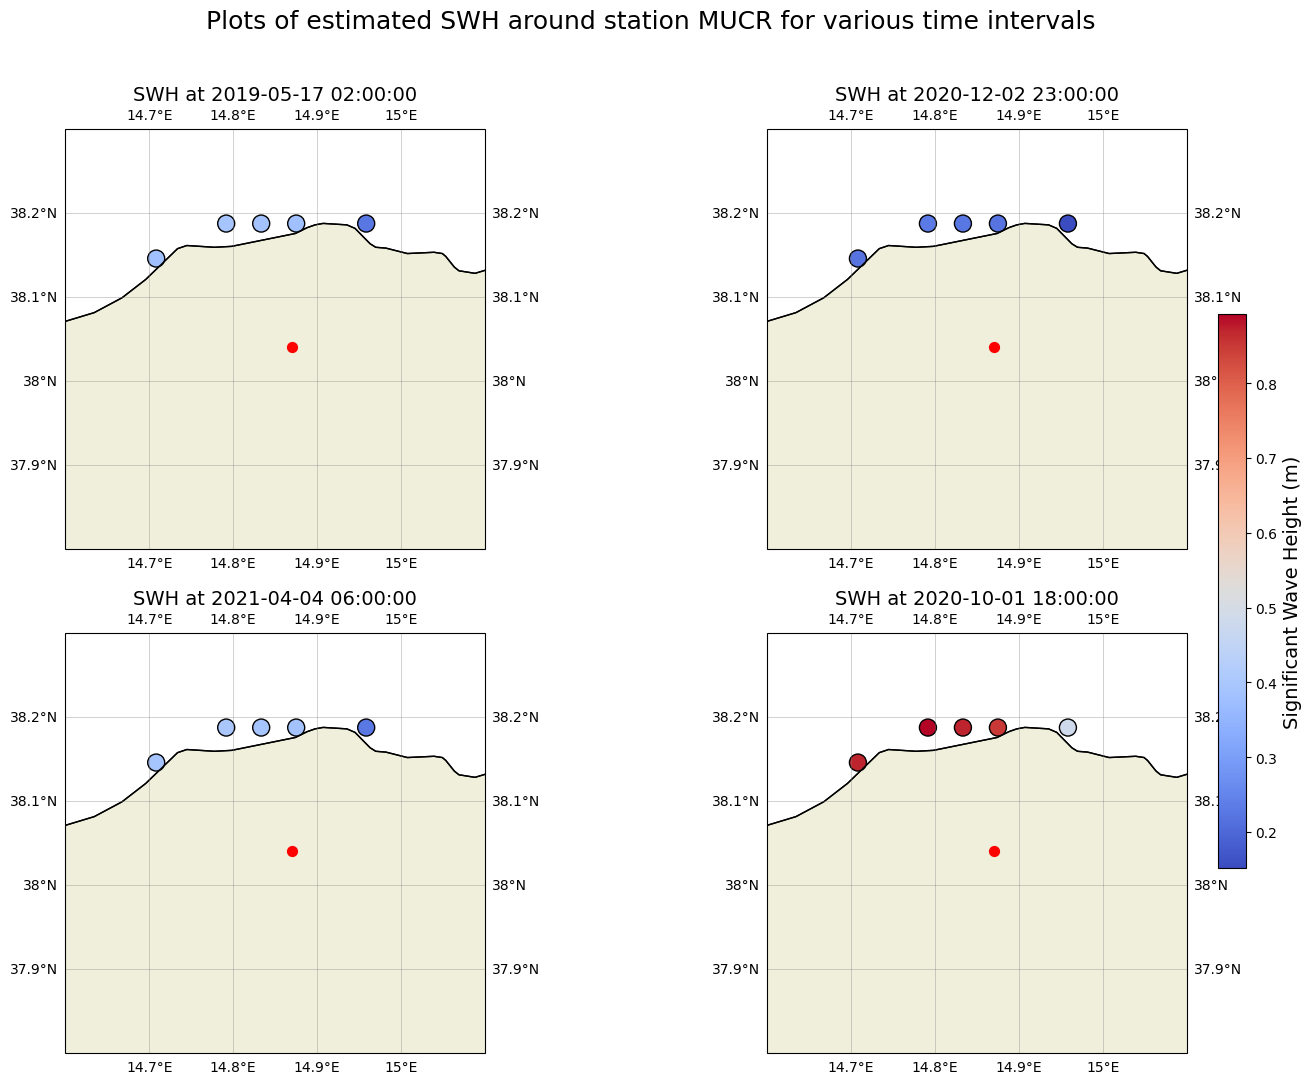

In [50]:
#Plot four timestamps in four subplots
best_Ypred.index = pd.to_datetime(best_Ypred.index)

selected_timestamps = [
    pd.to_datetime("2019-05-17 02:00:00"),
    pd.to_datetime("2020-12-02 23:00:00"),
    pd.to_datetime("2021-04-04 06:00:00"),
    pd.to_datetime("2020-10-01 18:00:00")
]

timestamps_to_plot = best_Ypred.loc[selected_timestamps]

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [14.6, 15.1, 37.8, 38.3]

#create the subplots
for timestamp, ax in zip(timestamps_to_plot.index, axes.flat):
    print(timestamp)

    #set map extent
    ax.set_extent(map_extent, crs=ccrs.PlateCarree())

    #add map features
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    #plot seismic stations
    ax.scatter(14.87, 38.04, color='red', marker='o', s=50, label='Seismic Stations')

    #get wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp, :]
    wave_heights = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords = wave_heights.index.to_list() #get the coordinates of the gridpoints
    lons, lats = zip(*coords)
    heights = wave_heights.values

    #scatter plot of wave heights
    sc = ax.scatter(lats, lons, c=heights, cmap='coolwarm', edgecolor='black', s=150, vmin=timestamps_to_plot.min().min(), vmax=timestamps_to_plot.max().max())

    #add title
    ax.set_title(f"SWH at {timestamp}", fontsize=14)

    #add gridlines
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

#colourbar
cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
cbar.set_label("Significant Wave Height (m)", fontsize=14)

fig.suptitle(f"Plots of estimated SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

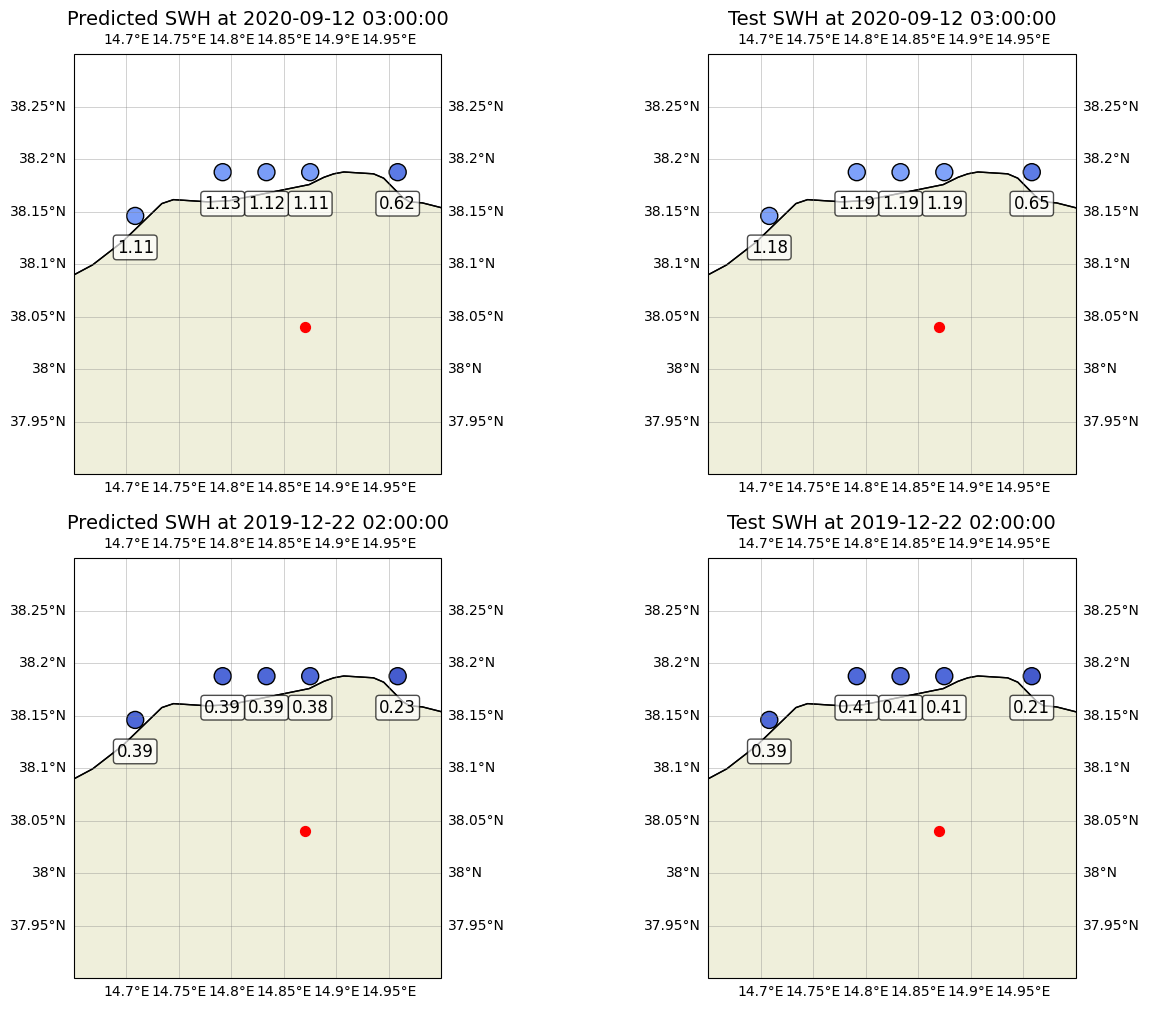

In [57]:
#Plot two timestamps in four subplots - one for pred and one for test for each timestamp
best_Ypred.index = pd.to_datetime(best_Ypred.index)
best_YTest.index = pd.to_datetime(best_YTest.index)

selected_timestamps = [
    pd.to_datetime("2020-09-12 03:00:00"),
    pd.to_datetime("2019-12-22 02:00:00")
    #pd.to_datetime("2020-12-14 20:00:00")
]

timestamps_to_plot_pred = best_Ypred.loc[selected_timestamps]
timestamps_to_plot_test = best_YTest.loc[selected_timestamps]

#global min and max to give a consistent colour scale across all the subplots - first five cols contain SWH
vmin = min(best_Ypred.iloc[:, :5].min().min(), best_YTest.iloc[:, :5].min().min())
vmax = max(best_Ypred.iloc[:, :5].max().max(), best_YTest.iloc[:, :5].max().max())

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [14.65, 15.0, 37.9, 38.3]

for idx, (timestamp_pred, timestamp_test) in enumerate(zip(timestamps_to_plot_pred.index, timestamps_to_plot_test.index)):
    ax_pred, ax_test = axes[idx, 0], axes[idx, 1]
    
    #set map extent
    ax_pred.set_extent(map_extent, crs=ccrs.PlateCarree())
    ax_test.set_extent(map_extent, crs=ccrs.PlateCarree())
    
    #add map features
    for ax in [ax_pred, ax_test]:
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.scatter(14.87, 38.04, color='red', marker='o', s=50, label='Seismic Stations')
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

    #get PREDICTED wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp_pred, :]
    wave_heights_pred = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_pred = wave_heights_pred.index.to_list() #get the coordinates of the gridpoints
    lons_pred, lats_pred = zip(*coords_pred)
    heights_pred = wave_heights_pred.values
    
    #scatter plot for predicted wave heights
    sc_pred = ax_pred.scatter(lats_pred, lons_pred, c=heights_pred, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_pred.set_title(f"Predicted SWH at {timestamp_pred}", fontsize=14)

    for lat, lon, height in zip(lats_pred, lons_pred, heights_pred):
        ax_pred.text(lat, lon-0.03, f"{height:.2f}", fontsize=12, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

    #get TEST wave height data for this timestamp
    best_timestamp_Test = best_YTest.loc[timestamp_test, :]
    wave_heights_test = best_timestamp_Test.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_test = wave_heights_test.index.to_list() #get the coordinates of the gridpoints
    lons_test, lats_test = zip(*coords_test)
    heights_test = wave_heights_test.values

    #scatter plot for test wave heights
    sc_test = ax_test.scatter(lats_test, lons_test, c=heights_test, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_test.set_title(f"Test SWH at {timestamp_test}", fontsize=14)

    for lat, lon, height in zip(lats_test, lons_test, heights_test):
        ax_test.text(lat, lon-0.03, f"{height:.2f}", fontsize=12, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

#colourbar
#cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
#cbar.set_label("Significant Wave Height (m)", fontsize=14)

#fig.suptitle(f"Plots of estimated and actual SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

# Time Series

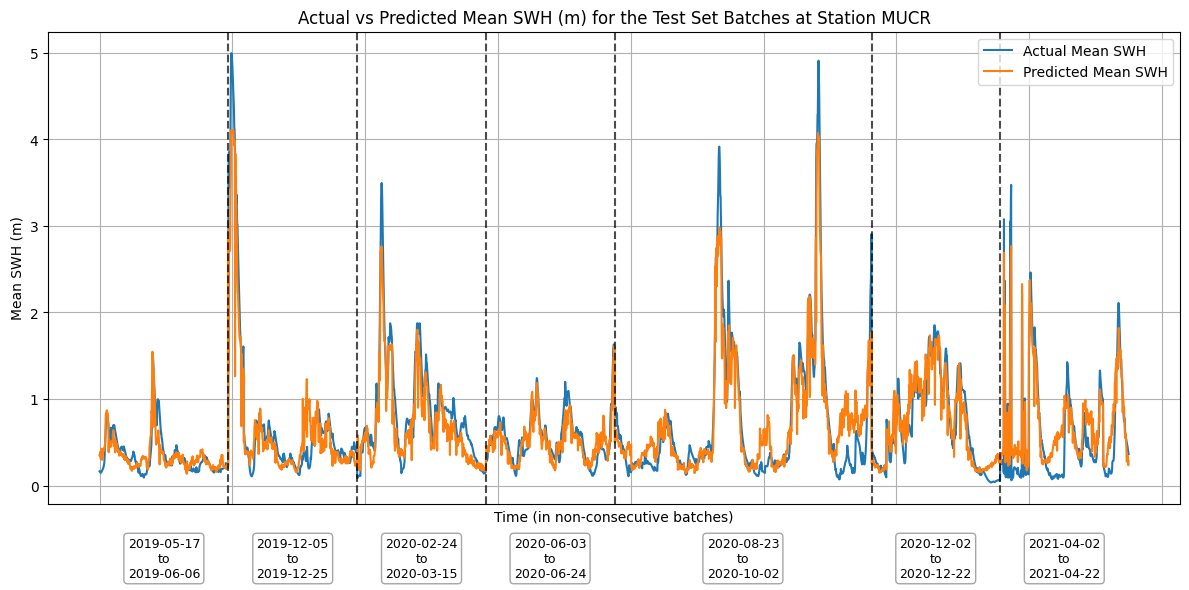

In [58]:
best_YTest.index = pd.to_datetime(best_YTest.index)
best_Ypred.index = pd.to_datetime(best_Ypred.index)

#YTest and Ypred share the same index
sea_mean_df = pd.DataFrame({'Actual': best_YTest.loc[best_Ypred.index, 'sea_mean'],
                            'Predicted': best_Ypred.loc[best_Ypred.index, 'sea_mean']
                           })

#reset the index to plot skipped parts where there is no data
sea_mean_df = sea_mean_df.reset_index()
sea_mean_df.rename(columns={'index': 'Timestamp'}, inplace=True)
sea_mean_df = sea_mean_df.sort_values('Timestamp').reset_index(drop=True)

#find when time gap is greater than 2 hours
time_deltas = sea_mean_df['Timestamp'].diff().dt.total_seconds() / 3600 #convert to hours
vline_spacing = time_deltas[time_deltas >= 2].index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sea_mean_df.index, sea_mean_df['Actual'], label='Actual Mean SWH')
ax.plot(sea_mean_df.index, sea_mean_df['Predicted'], label='Predicted Mean SWH')

#plot vertical lines
for x in vline_spacing:
    ax.axvline(x=x, color='black', alpha=0.7, linestyle='--')

#get xlabels
chunk_ends = [vline_spacing[0]-1] + [vline_spacing[j+1]-1 for j in range(len(vline_spacing)-1)] + [len(sea_mean_df)-1]
chunk_starts = [0] + vline_spacing

for start, end in zip(chunk_starts, chunk_ends):
    midpoint = (start + end) // 2
    start_time = sea_mean_df.loc[start, 'Timestamp'].strftime('%Y-%m-%d')
    end_time = sea_mean_df.loc[end, 'Timestamp'].strftime('%Y-%m-%d')
    label = f"{start_time}\nto\n{end_time}"

    ax.text(midpoint, -0.07, label, transform=ax.get_xaxis_transform(),
            ha='center', va='top', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.7))
    
#switch off default x ticks, major and minor, from the bottom and the top and remove xlabels
plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)

plt.xlabel("Time (in non-consecutive batches)")
plt.ylabel("Mean SWH (m)")
plt.title(f"Actual vs Predicted Mean SWH (m) for the Test Set Batches at Station {station}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()